In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as pp

In [4]:
nrows = 60000

In [5]:
!ls

accuracies.csv	ml-knn.ipynb   mnist_test.csv
lost+found	ml-nene.ipynb  mnist_train.csv


In [6]:
mnist_test = pd.read_csv('./mnist_test.csv', header=None)

In [7]:
mnist_train = pd.read_csv('./mnist_train.csv', header=None, nrows=nrows)

In [8]:
cnames = ["label"] + ['px_%s.%s' % (x,y) for x in range(28) for y in range(28)]

In [9]:
mnist_train.columns = cnames

In [10]:
mnist_test.columns = cnames

In [11]:
image_size = 28

In [12]:
label_train = mnist_train['label'].values

In [13]:
label_train.shape

(60000,)

In [14]:
label_test = mnist_test['label'].values

In [15]:
label_test.shape

(10000,)

In [16]:
image_train = mnist_train.values[:, 1:]

In [17]:
image_train.shape

(60000, 784)

In [18]:
image_test = mnist_test.values[:, 1:]

In [19]:
image_test.shape

(10000, 784)

In [20]:
image_train = image_train.reshape(nrows, 28, 28)

In [21]:
image_test = image_test.reshape(10000, 28, 28)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
lines_train = image_train.reshape(nrows, 784)

In [24]:
lines_test = image_test.reshape(10000, 784)

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
activations = [ 'identity', 'logistic', 'tanh', 'relu']

In [27]:
def hls_single(value):
    return (value,)

def hls_double(value):
    return (value, value)

def hls_triple(value):
    return (value, value, value)

def hls_bisect(value):
    return (value, value // 2, value // 4, value // 8)

def hls_stairs(value):
    return (value, 3 * value // 4, 2 * value // 4, 1 * value // 4)

In [28]:
hlss = {
    'single': hls_single,
    'double': hls_double,
    'triple': hls_triple,
    'bisect': hls_bisect,
    'stairs': hls_stairs,
}

In [29]:
def try_activations(ranges, hlsf):
    ranges = list(ranges)
    accuracies = np.zeros((len(ranges), len(activations)))
    
    for i, factor in enumerate(ranges):
        hls = hlsf(factor)
        
        for j, activation in enumerate(activations):
            print(f'run: {activation} @ {hls}')
            mlpc = MLPClassifier(activation=activation, random_state=0, hidden_layer_sizes=hls)
            %time mlpc = mlpc.fit(lines_train, label_train)

            pp.plot(range(mlpc.n_iter_), mlpc.loss_curve_)
            pp.show()
            print()

            preds_test = mlpc.predict(lines_test)

            accuracies[i, j] = accuracy_score(label_test, preds_test)
            print(accuracies[i, j])
            print()


        #print (f'hidden layer sizes: {hls}')
        #pp.bar(activations, accuracies[i, :])
        #pp.show()
        
    #print(f'per-activation effectiveness')

    #str_ranges = [str(factor) for factor in ranges]
    #for j, activation in enumerate(activations):
    #    print(f'activation: {activation}')
    #    pp.bar(str_ranges, accuracies[:, j])
    #    pp.show()
        
    return accuracies

In [30]:
factors = list(range(800, 0, -100))

run: identity @ (800,)
CPU times: user 13min 22s, sys: 21min 54s, total: 35min 17s
Wall time: 2min 16s


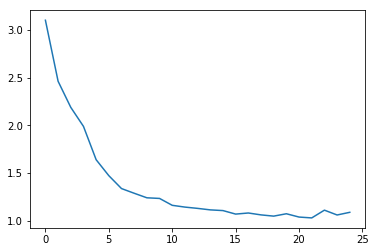


0.8684

run: logistic @ (800,)
CPU times: user 18min 41s, sys: 35min 10s, total: 53min 52s
Wall time: 3min 26s


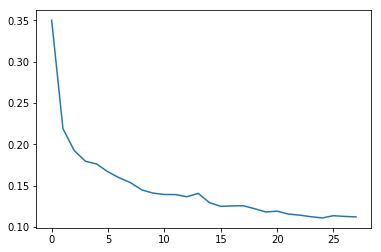


0.9609

run: tanh @ (800,)
CPU times: user 14min 4s, sys: 24min 52s, total: 38min 57s
Wall time: 2min 29s


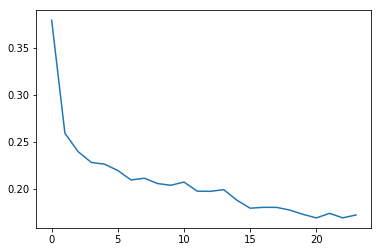


0.9445

run: relu @ (800,)
CPU times: user 4min 53s, sys: 8min 11s, total: 13min 5s
Wall time: 50.6 s


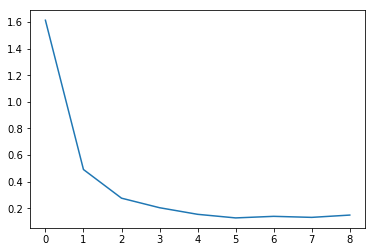


0.9658

run: identity @ (700,)


In [ ]:
accuracies_per_hlsf = {}
for hlsf in hlss:
    accuracies_per_hlsf[hlsf] = try_activations(factors, hlss[hlsf])

In [ ]:
accuracies_per_hlsf

In [ ]:
accuracies_list = [
    (hlsf, factors[factor], activations[activation], accuracies_per_hlsf[hlsf][0][activation])
    for hlsf in hlss
    for factor in range(len(factors))
    for activation in range(len(activations))
]

In [ ]:
accuracies = pd.DataFrame(accuracies_list, columns=['hlsf','factor','activation','accuracy'])

In [ ]:
accuracies

In [ ]:
accuracies.iloc[[accuracies['accuracy'].idxmax()]]

In [ ]:
accuracies.to_csv('accuracies.csv')